###### GW Approximatiom
$$G(\tau_j)=\frac{1}{\beta}\sum_{n=0}^{N-1}e^{-i\omega_n\tau_j}G(i\omega_n)$$
$$G(i\omega_n)=\frac{\beta}{N}\sum_{n=0}^{N-1}e^{i\omega_n\tau_j}G(\tau_j)$$




The effect Hamiltonian for bilayer graphene is following:
$$H_{eff}=\frac{1}{2m}
\begin{pmatrix}
	0 & (k_x-ik_y)^2\\
	(k_x+ik_y)^2 & 0\\
\end{pmatrix}$$
where $m=\frac{t_{\bot}}{2v^2}\approx 0.0054m_e$. Eigenvalue for this Hamiltonian is: $E(\textbf{k})=\pm\frac{k^2}{2m}$

$$\rho(\textbf{q})=\int d^2re^{-i\textbf{q}\cdot\textbf{r}}c_r^\dagger c_r=\sum_\textbf{k}c_{\textbf{k+q}}^\dagger c_\textbf{k}$$
$$V_\textbf{q}=\frac{2\pi e^2}{\kappa q}$$

$$A_\vec{k}(\omega)=-\frac{1}{\pi}Im[tr\hat{G}_\vec{k}(\omega+i0^+)]$$


#### Library

In [1]:
from numpy import*
from math import*
from sys import*
import cmath
import scipy
import pylab
import mpmath as mp
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sympy.physics.quantum import TensorProduct
from sympy import Matrix, I
#
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum.state import Ket, Bra
from sympy.physics.quantum.operator import Operator
from decimal import *
from numpy.linalg import *
#prec = 128

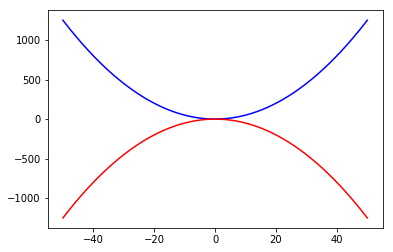

In [2]:
m = 1
def E(k):
    return k**2/(2*m)
k = arange(-50.0, 50.0, 0.0001)
plt.plot(k, E(k), 'b')
plt.plot(k, -E(k), 'r')

##### The non-interacting Green's function
$$\hat{G}^0_{\vec{k}}(i\omega_n)=(i\omega_n-H_{eff}+\mu)^{-1}=\frac{1}{2}\sum_{s=\pm}\frac{\Bbb1+s\hat{\sigma}_\vec{k}}{i\omega_n-s|\epsilon_k|+\mu}$$
$s$ indexes the conductance and valence bands, $\mu$ is the chemical potential, $\sigma_\vec{k}$ is given by

$$\hat{\sigma}_\vec{k}=\sum_{j=\pm}\frac{k_j^2}{k^2}\hat{\sigma}_j=\sum_{j=\pm}e^{j2i\theta_\vec{k}}\hat{\sigma}_j=\begin{pmatrix}
	0 & e^{2i\theta_\vec{k}}\\
	e^{-2i\theta_\vec{k}} & 0\\
\end{pmatrix}$$

where $k_\pm=k_x\pm ik_y$ and $\hat{\sigma}_\pm=(\hat{\sigma}_1\pm i\hat{\sigma}_2)$

$$\varPi_\vec{q}(i\omega_n)=-\frac{g}{\beta}\sum_{m=-\infty}^\infty\int\frac{d^2k}{(2\pi)^2}Tr(\hat{G}_\vec{k}(i\omega_m)\hat{G}_{\vec{k}+\vec{q}}(i\omega_n+i\omega_m))$$

the screen potential is:

$$W_\vec{q}(i\omega_n)=\frac{V_\vec{q}}{\Bbb1+\varPi_\vec{q}(i\omega_n)V_\vec{q}}$$

The GW self-energy for the two-band case is generalized to

$$\hat{\sum}_\vec{k}^{GW}(i\omega_n)=\frac{1}{\beta}\sum_\vec{q}\sum_{m=-\infty}^\infty W_\vec{q}(i\omega_m)\hat{G}_{\vec{k}-\vec{q}}(i\omega_n-i\omega_m)$$

##### Variable

In [3]:
N = int(input("please enter number of frequency= "))
#DELTA = int(input("please enter number of potential convergence, DELTA = "))
#N = 4
beta = 10.0
mu = 1.0
rs = 7.0
k1 = 0.0
k2 = 4.0
nk = 41
nk1 = 19
nk2 = 19
ntheta = 100
eta = beta/(2*N)
#################
lambda1 = abs(log(1-k1)-4 * log(10))
lambda2 = abs(log(k2-1) + 4 * log(10))

please enter number of frequency= 10


/home/badie/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


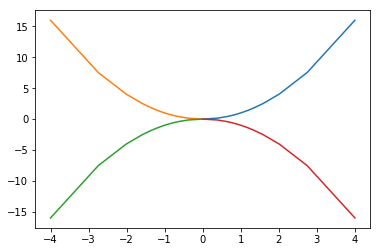

In [4]:
k = zeros((nk), dtype=complex)
for s in range(0, nk1+1, 1):
    k[s] = 1 - cmath.exp(-(s) * lambda1 / nk1)
    k[20] = 1.0
for s in range(0, nk2+1, 1):
    k[s + 21] = 1 + cmath.exp(-lambda1 + (s) * lambda2 / nk2)
k = array(k) # k is a matrix with one column
#print (k)
Ek = zeros((nk),dtype=complex)
Ek=k**2
plt.plot(k,Ek)
plt.plot(-k,Ek)
plt.plot(-k,-Ek)
plt.plot(k,-Ek)
#print (Ek)

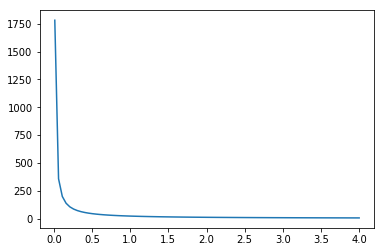

In [5]:
nqq = 81
qq1 = 1.0 / nqq
qq2 = 4
nq = nqq + 1
lambdaq = abs(qq2 - qq1)
qq = zeros((nq), dtype=complex)
vq = zeros((nq), dtype=complex)
for s in range(0, nq, 1):
    qq[s] = qq1 + (s) * lambdaq / nqq
    vq[s] = pi * rs / qq[s]
#    print qq
q = array(qq)
vq = array(vq)
#print (q)
#print (vq)
plt.plot(qq,vq)

In [6]:
OmegaFermionic = zeros((N), dtype=complex)
for i in range(0, N):
    OmegaFermionic[i] = (2 * (i) + 1) * pi / beta
#OmegaFermionic = mat([OmegaFermionic]).T
OmegaFermionic = array(OmegaFermionic)
#print (OmegaFermionic, "====")
f = open("OmegaFermionic.txt","w")   #create add file in write mode
f.write(str(OmegaFermionic))  #writes o/p to add.txt file 
f.close()                     #closing file object

In [7]:
OmegaBosonic = zeros((N), dtype=complex)
for i in range(0, N):
    OmegaBosonic[i] = (2 * (i) ) * pi / beta
OmegaBosonic = array(OmegaBosonic)
#print (OmegaBosonic,"====" )
OmegaFB = zeros((N,N), dtype=complex)
for i in range(0,N):
    for j in range(0,N):
        OmegaFB[i,j] = OmegaFermionic[i]+OmegaBosonic[j]#WF+WB
#print (OmegaFB)

#### $\tau = \frac{\beta}{N_\omega}j$ 
where $j=1,2, ..., N_\omega-1$

In [8]:
theta = zeros((ntheta), dtype=complex)
for s in range(0, ntheta):
    theta[s] = 2 * pi * (s) / ntheta + pi / ntheta
theta = array(theta)
#print (theta)
tau = zeros((N), dtype=complex)#is a matrix with one row
for i in range(0, N):
    tau[i] = ( (i) * beta) / N
tau = array(tau)
#print (tau)
#W = array([omega])
#print (TensorProduct(W,W.conj().T)
#print (W.conj().T)

In [9]:
Fmatrix_fermionic = zeros((N, N), dtype=complex)
inverse_Fmatrix_fermionic = zeros((N, N), dtype=complex)
for i in range(0,N):
    for j in range(0,N):
        Fmatrix_fermionic[i,j] = cmath.exp(tau[i]*OmegaFermionic[j]*1j)
        inverse_Fmatrix_fermionic[i,j] = cmath.exp(-tau[i]\
        *OmegaFermionic[j]*1j)
Fmatrix_fermionic = array(Fmatrix_fermionic)
inverse_Fmatrix_fermionic = array(inverse_Fmatrix_fermionic)
#inverse_Fmatrix_fermionic = mat(inv(Fmatrix_fermionic))
#inverse_Fmatrix_fermionic = inv(Fmatrix_fermionic)
#print Fmatrix_fermionic, '===', inverse_Fmatrix_fermionic
#print inverse_Fmatrix_fermionic*Fmatrix_fermionic

In [10]:
Fmatrix_Bosonic = zeros((N, N), dtype=complex)
inverse_Fmatrix_Bosonic = zeros((N, N), dtype=complex)

for i in range(0,N):
    for j in range(0,N):
        Fmatrix_Bosonic[i,j] = cmath.exp(tau[i]*OmegaBosonic[j]*1j)
        inverse_Fmatrix_Bosonic[i,j] = cmath.exp(-tau[i]\
        *OmegaBosonic[j]*1j)
Fmatrix_Bosonic = array(Fmatrix_Bosonic)
inverse_Fmatrix_Bosonic = array(inverse_Fmatrix_Bosonic)
#print (Fmatrix_Bosonic)
#print "-------------------------"
#print inverse_Fmatrix_Bosonic
#print "////////////"
#print (dot(Fmatrix_Bosonic,inverse_Fmatrix_Bosonic))

###### Functions

In [11]:
def toOmega1(ex):
    return (beta/N)*(dot(ex,Fmatrix_Bosonic))
 
def toTau1(ex):  
    return (1/beta)*(dot(inverse_Fmatrix_Bosonic,ex))

In [12]:
def ToTau(ex):
    list11 = zeros((N), dtype=complex)  #(N Omega)
    list12 = zeros((N), dtype=complex)
    list21 = zeros((N), dtype=complex)
    Flist11 = zeros((N), dtype=complex)
    Flist12 = zeros((N), dtype=complex)
    Flist21 = zeros((N), dtype=complex)
    F = zeros((N,2,2), dtype=complex)
    for i in range(0,N):
        list11[i] = ex[i,0 ,0]
        list12[i] = ex[i,0, 1]
        list21[i] = ex[i,1 ,0]
        list11 = array(list11)
        list12 = array(list12)
        list21 = array(list21)
       
    Flist11 = (1/beta)*dot(inverse_Fmatrix_fermionic,list11)
    Flist12 = (1/beta)*dot(inverse_Fmatrix_fermionic,list12)
    Flist21 = (1/beta)*dot(inverse_Fmatrix_fermionic,list21)
    for i in range(0,N):
        F[i,0,0] = Flist11[i]
        F[i,0,1] = Flist12[i]
        F[i,1,0] = Flist21[i]
        F[i,1,1] = Flist11[i]       
    return F

In [13]:
def ToOmega(ex):
    list11 = zeros((N), dtype=complex)  #(N tau)
    list12 = zeros((N), dtype=complex)
    list21 = zeros((N), dtype=complex)
    Flist11 = zeros((N), dtype=complex)
    Flist12 = zeros((N), dtype=complex)
    Flist21 = zeros((N), dtype=complex)
    F = zeros((N,2,2), dtype=complex)
    for i in range(0,N):
        list11[i] = ex[i,0 ,0]
        list12[i] = ex[i,0, 1]
        list21[i] = ex[i,1 ,0]
        list11 = array(list11)
        list12 = array(list12)
        list21 = array(list21)
       
    Flist11 = (beta/N)*dot(list11,Fmatrix_fermionic)
    Flist12 = (beta/N)*dot(list12, Fmatrix_fermionic)
    Flist21 = (beta/N)*dot(list21, Fmatrix_fermionic)
    for i in range(0,N):
        F[i,0,0] = Flist11[i]
        F[i,0,1] = Flist12[i]
        F[i,1,0] = Flist21[i]
        F[i,1,1] = Flist11[i]       
    return F

In [14]:
def TrDotProduct(tensor1, tensor2):
    product = dot(tensor1, tensor2)
    return trace(product)
##################
def coth(x):
    return (cmath.exp(2*x)+1)/(cmath.exp(2*x)-1)

###### $G_0^{-1}=
\begin{pmatrix}
    \cdots & \colon & \colon & \cdots \\
	\cdots & 
    \begin{pmatrix}
	i\omega_j+\mu & -\epsilon_k\\
	-\epsilon_k & i\omega_j+\mu \\
    \end{pmatrix}
    & \begin{pmatrix}
	i\omega_j+\mu & -\epsilon_{k+1}\\
	-\epsilon_{k+1} & i\omega_j+\mu\\
    \end{pmatrix} &\cdots\\
	\cdots & 
    \begin{pmatrix}
	i\omega_{j+1}+\mu & -\epsilon_k\\
	-\epsilon_k & i\omega_{j+1}+\mu\\
    \end{pmatrix}
    & \begin{pmatrix}
	i\omega_{j+1}+\mu & -\epsilon_{k+1}\\
	-\epsilon_{k+1} & i\omega_{j+1}+\mu\\
    \end{pmatrix} & \cdots\\
    \cdots & \colon & \colon & \cdots\\
\end{pmatrix}$

In [15]:
def G0inverse_F(Ek):
    G0 = zeros((nk, N, 2, 2), dtype=complex) #N omega and nk 
    #w1->(2*2 matrix)
    #................
    #................
    #wN->(2*2 matrix)
    for i in range(0,nk):
        for j in range(0,N):
            G0[i,j,0,0] = 1j*OmegaFermionic[j]+mu
            G0[i,j,0,1] = -Ek[i]
            G0[i,j,1,0] = -Ek[i]
            G0[i,j,1,1] = 1j*OmegaFermionic[j]+mu
    return G0
###############
def G0inverse_B(Ek):
    G0 = zeros((nk, N, 2, 2), dtype=complex) #N omega and nk 
    #w1->(2*2 matrix)
    #................
    #................
    #wN->(2*2 matrix)
    for i in range(0,nk):
        for j in range(0,N):
            G0[i,j,0,0] = 1j*OmegaBosonic[j]+mu
            G0[i,j,0,1] = -Ek[i]
            G0[i,j,1,0] = -Ek[i]
            G0[i,j,1,1] = 1j*OmegaBosonic[j]+mu
    return G0

###  
$$Matrix(A)=
\begin{pmatrix}
|eigenvector_1\rangle&|eigenvector_2\rangle & \cdots
\end{pmatrix}\cdotp
Diagonal_{A-matrix}\cdotp
\begin{pmatrix}
|eigenvector_1\rangle&|eigenvector_2\rangle & \cdots
\end{pmatrix}^{-1}$$

where $$Diagonal_{matrix}=
\begin{pmatrix}
  eigenvalue_1&0&0\\
  0&eigenvalue_1&0\\
  0&0&eigenvalue_1\\  
\end{pmatrix}$$

$$P=(|eigenvector_1\rangle,|eigenvector_2\rangle, ... )$$

Exponential
$$A=PDP^{-1}$$

$$e^{\alpha A}=P
\begin{pmatrix}
e^{\alpha Eig_1}&0&0&\cdots\\
0&e^{\alpha Eig_1}&0&\cdots\\
\colon&\colon&\colon&\ddots\\
\end{pmatrix}
P^{-1}$$

$coth\eta(z)=\frac{P(e^{\eta D_z}+e^{-\eta D_z})P^{-1}}{P(e^{\eta D_z}-e^{-\eta D_z})P^{-1}}=coth\eta(D_z)$ that $D_z$ is diagonal of z matrix.
$$coth\eta(D_z)=
\begin{pmatrix}
coth(\eta\lambda_1)&0\\
0&coth(\eta\lambda_2)\\
\end{pmatrix}$$

In [16]:
def Gtrue(Ginverse):
    G = zeros((nk,N, 2, 2), dtype=complex) #N omega   
    ev = zeros((nk,N, 2, 2), dtype=complex) #N omega
    e = zeros((nk,N, 1, 2), dtype=complex) #N omega 
    D = zeros((nk,N, 2, 2), dtype=complex) #N omega 
    for i in range(0,nk):
        for j in range(0,N):
            e[i,j], ev[i,j] = linalg.eig(eta*Ginverse[i,j])
            D[i,j,0,0] = eta*coth(e[i,j,0,0])
            D[i,j,0,1] = 0. 
            D[i,j,1,0] = 0.
            D[i,j,1,1] = eta*coth(e[i,j,0,1])       
            G[i,j] = dot(ev[i,j],dot(D[i,j],inv(ev[i,j]))) 
    return G

##### $\hat{G}_\vec{k}(i\omega_n)=\eta coth(\eta\hat{G}^{o-1}_{\vec{k}}(i\omega_n)-\eta\hat{\sum}_\vec{k}(i\omega_n))$

##### $k'=kq=|\vec{k}+\vec{q}|=\sqrt{k^2+q^2\pm 2kqcos\theta_{kq}}$
In this section $k'$ is selected. 

In [17]:
def GG(kprime, Gktau):
    Gkq = zeros((nk,N,2,2), dtype=complex)
#    Gktau = zeros((nk,N,2,2), dtype=complex)
    if kprime > max(k).real or kprime < min(k).real:
        Gkq = zeros((nk,N,2,2), dtype=complex)#N is Length TauValues
    else:
        for i in range(1,nk):
            if kprime == k[i]:
                Gkq[i] = Gktau[i]
            elif kprime == k[0]:
                Gkq[0] = Gktau[0]
            elif k[i-1] < kprime < k[i]:
                for m in range(0, N):  #N is Length TauValues
                    x = [k[i-1], k[i]]
                    y11 = [Gktau[i-1,m,0,0],Gktau[i,m,0,0]]
                    Gkq.real[i-1,m,0,0] = interp(kprime, x, y11).real
                    Gkq.imag[i-1,m,0,0] = interp(kprime, x, y11).imag

                    y12 = [Gktau[i-1,m,0,1],Gktau[i,m,0,1]]
                    Gkq.real[i-1,m,0,1] = interp(kprime, x, y12).real
                    Gkq.imag[i-1,m,0,1] = interp(kprime, x, y12).imag
                    
                    y21 = [Gktau[i-1,m,1,0],Gktau[i,m,1,0]]
                    Gkq.real[i-1,m,1,0] = interp(kprime, x, y21).real
                    Gkq.imag[i-1,m,1,0] = interp(kprime, x, y21).imag

    return Gkq

In [18]:
def GGrotation(G, ex):
#    G = zeros((nk,N,2,2), dtype=complex)#N is Length TauValues
    for i in range(0,nk):
        for j in range(0,N):
            G[i,j,0,0] = G[i,j,0,0]
            G[i,j,0,1] = ex*G[i,j,0,1]
            G[i,j,1,0] = conjugate(ex)*G[i,j,1,0]
            G[i,j,1,1] = G[i,j,0,0]
    return G
##################    
def Gkomega_F(sigma):
    for i in range(0,nk):
        return Gtrue(G0inverse_F(Ek)-sigma)
#################      
def Gkomega_B(sigma):
    for i in range(0,nk):
        return Gtrue(G0inverse_B(Ek)-sigma)
###############

In [19]:
sigma = zeros((nk,N,2,2), dtype=complex)
Gkomega = Gkomega_F(sigma)

#print (Gkomega_F)

###### $G_k(\tau)$

In [20]:
Gktau = zeros((nk,N,2,2), dtype=complex)# G(k.t)
for i in range(0,nk):
    Gktau[i] = ToTau(Gkomega[i]) 

Gk_tau = zeros((nk,N,2,2), dtype=complex)
# G(k,-t) Flensberg page(173-chapter 10)
for i in range(0, nk):
    Gk_tau[i,0] = Gktau[i,0]
    for j in range(1,N):
        Gk_tau[i,j] = Gktau[i,N-j]

###### $\vec{Q}(k,q,\theta)=\vec{k}+\vec{q}$

In [21]:
KplusQ = zeros((nq, ntheta, nk),dtype=complex)
exkq = zeros((nq, ntheta, nk),dtype=complex)
GrotKplusQtau = zeros((nq,ntheta,nk,N,2,2), dtype=complex)
for j in range(0,nq):
    for l in range(0,ntheta):
        for i in range(0,nk):
            KplusQ[j,l,i] = (cmath.sqrt(k[i]**2+q[j]**2+2*k[i]*q[j]*\
            cos(theta[l]))).real
            exkq[j,l,i] = (k[i]*cmath.exp(1j*theta[l])+q[j])/\
            (k[i]*cmath.exp(-1j*theta[l])+q[j])

for j in range(0,nq):
    for l in range(0,ntheta):
        for i in range(0,nk):
            if KplusQ[j,l,i] < max(k).real or KplusQ[j,l,i] == max(k).real:
                kprime = KplusQ[j,l,i]
                ex = exkq[j,l,i]
                GrotKplusQtau[j,l] = GGrotation(GG(kprime, Gktau),ex)

#print GrotKplusQtau#[:,:,:,2]

/home/badie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
/home/badie/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1308: ComplexWarning: Casting complex values to real discards the imaginary part
  return interp_func(x, xp, fp, left, right)


##### GWA

In [25]:
GrotK_tau = zeros((ntheta, nk, N, 2, 2), dtype=complex) 
for l in range(0,ntheta):
    exk = cmath.exp(2*1j*theta[l])   
    GrotK_tau[l] = GGrotation(Gk_tau,exk)# in here  GGrotation==Gk_tau
#print GrotK_tau
###   
GrotKplusQtau[:,:,:,0] = -0.5*identity(2)
GrotK_tau[:,:,0] = 0.5*identity(2)
#print "GrotKplusQtau =", GrotKplusQtau
#print "GrotK_tau =", GrotK_tau
###########
Matrixproduct = zeros((nq,ntheta,nk,N,1), dtype=complex)
for i in range(0,nq):
    for j in range(0,ntheta):
        for m in range(0,N):
            for n in range(1, nk-1):  # N is numbr of tau
                Matrixproduct[i,j,n,m] = ((k[n+1]-k[n-1])*k[n]/2)\
                *trace(dot(GrotK_tau[j,n,m], GrotKplusQtau[i,j,n,m]))
#print (Matrixproduct) #[60,0,0,3])

In [26]:
PPi = zeros((nq,N), dtype=complex)
for i in range(0,nq):
    for m in range(0,N):
        PPi.real[i,m] = (sum(sum(Matrixproduct[i,j,n,m].real\
        for j in range(0,ntheta)) for n in range(0,nk)))
        PPi.imag[i,m] = (sum(sum(Matrixproduct[i,j,n,m].imag\
        for j in range(0,ntheta)) for n in range(0,nk)))
PPi_Qtau = (-4/(2*pi*ntheta))*PPi
#print PPi_Qtau
PPi_Qw = zeros((nq,N), dtype=complex)
for i in range(0,nq):
    PPi_Qw[i] = toOmega1(PPi_Qtau[i])
#print PPi_Qw

/home/badie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """
/home/badie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  import sys


In [27]:
Veff_QiW_new = zeros((nq,N),dtype=complex)
Veff_Qtau_new = zeros((nq,N),dtype=complex)

Veff_QiW = zeros((nq,N),dtype=complex)
for i in range(0,nq):
    for j in range(0,N):
        Veff_QiW[i,j] = vq[i]/(1+vq[i]*PPi_Qw[i,j])
#print (Veff_QiW)

In [28]:
epsilon = zeros((nq,N),dtype=complex)
for i in range(0,nq):
    for j in range(0,N):
        epsilon[i,j] = 1+vq[i]*PPi_Qw[i,j]
        
epsilon = (-epsilon**(-1)).imag
#print (epsilon)
#x = arange(0,4)
#y= arange(0,4)
#X,Y = meshgrid(x,y)
#plt.contourf(X,Y,epsilon)
#plt.contourf(epsilon)
#plt.show()
#########

In [29]:
Veff_Qtau = zeros((nq,N),dtype=complex)
for i in range(0,nq):
    Veff_Qtau[i] = toTau1(Veff_QiW[i])
#print (Veff_Qtau)#[2,3])

In [30]:
KminusQ = zeros((nq, ntheta, nk),dtype=complex)
exk_q = zeros((nq, ntheta, nk),dtype=complex)
GrotKminusQtau = ones((nq,ntheta,nk,N,2,2), dtype=complex)
for j in range(0,nq):
    for l in range(0,ntheta):
        for i in range(0,nk):
            KminusQ[j,l,i] = (cmath.sqrt(k[i]**2+q[j]**2-2*k[i]*q[j]*\
            cos(theta[l]))).real
            exk_q[j,l,i] = (-q[j]*cmath.exp(1j*theta[l])+k[i])/\
            (-q[j]*cmath.exp(-1j*theta[l])+k[i])

for j in range(0,nq):
    for l in range(0,ntheta):
        for i in range(0,nk):
            if KminusQ.real[j,l,i] < max(k).real \
            or KplusQ.real[j,l,i] == max(k).real:
                kprime = KminusQ[j,l,i]
                ex = exk_q[j,l,i]
                GrotKminusQtau[j,l] = GGrotation(GG(kprime,Gktau),ex)
#print GrotKminusQtau
#print GrotKminusQtau[:,:,:,2]

/home/badie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [31]:
SS = zeros((nq,ntheta,nk,N,2,2), dtype=complex)

for i in range(1,nq-1):
    for m in range(0,ntheta):
        for l in range(0,nk):
            for n in range(0,N):
                SS[i,m,l,n] = ((q[i+1]-q[i-1])*q[i]/2)*\
                Veff_Qtau[i,n]*GrotKminusQtau[i,m,l,n]
#print SS

In [32]:
sigmaktau = zeros((nk,N,2,2),dtype=complex)       
sigmakomega =  zeros((nk,N,2,2),dtype=complex)
for l in range(0,nk):
    for n in range(0,N):
        sigma.real[l,n] = (sum(sum(SS[i,m,l,n].real\
        for m in range(0,ntheta)) for i in range(0,nq)))
        sigma.imag[l,n] = (sum(sum(SS[i,m,l,n].imag\
        for m in range(0,ntheta)) for i in range(0,nq)))
sigmaktau = (-1/(2*pi*ntheta))*sigma 
for i in range(0,nk):
    sigmakomega[i] = ToOmega(sigmaktau[i])
#print sigmakomega
#print sigmaktau
#    ####################################
while True:
    Gkomega_new =  zeros((nk,N,2,2),dtype=complex)  
    Gkomega_new = Gkomega_F(sigmakomega)
    Gktau_new = zeros((nk,N,2,2), dtype=complex)# G(k.t)
    for i in range(0,nk):
        Gktau_new[i] = ToTau(Gkomega_new[i]) 
    Gk_tau_new = zeros((nk,N,2,2), dtype=complex)
    # G(k,-t) Flensberg page(173-chapter 10)
    for i in range(0, nk):
        Gk_tau_new[i,0] = Gktau_new[i,0]
        for j in range(1,N):
            Gk_tau_new[i,j] = Gktau_new[i,N-j]
##
    Gkomega_new_inverse = zeros((nk,N,2,2),dtype=complex)
    for i in range(0, nk):
        for j in range(0,N):
            Gkomega_new_inverse[i,j] = inv(Gkomega_F(sigmakomega)[i,j])    
#print Gkomega_new_inverse
###########################################################
    for j in range(0,nq):
        for l in range(0,ntheta):
            for i in range(0,nk):
                if KplusQ[j,l,i] < max(k).real or\
                KplusQ[j,l,i] == max(k).real:
                    kprime = KplusQ[j,l,i]
                    ex = exkq[j,l,i]
                    GrotKplusQtau[j,l] = GGrotation(GG(kprime,Gktau_new),ex)            
#####################################################
    for l in range(0,ntheta):
        exk = cmath.exp(2*1j*theta[l])   
        GrotK_tau[l] = GGrotation(Gk_tau_new,exk)
    GrotKplusQtau[:,:,:,0] = -0.5*identity(2)
    GrotK_tau[:,:,0] = 0.5*identity(2)
#######
    Matrixproduct = zeros((nq,ntheta,nk,N,1), dtype=complex)
    for i in range(0,nq):
        for j in range(0,ntheta):
            for m in range(0,N):
                for n in range(1, nk-1):  # N is numbr of tau
                    Matrixproduct[i,j,n,m] = ((k[n+1]-k[n-1])*k[n]/2)\
                    *trace(dot(GrotK_tau[j,n,m], GrotKplusQtau[i,j,n,m]))

    PPi = zeros((nq,N), dtype=complex)
    for i in range(0,nq):
        for m in range(0,N):
            PPi.real[i,m] = (sum(sum(Matrixproduct[i,j,n,m].real\
            for j in range(0,ntheta)) for n in range(0,nk)))
            PPi.imag[i,m] = (sum(sum(Matrixproduct[i,j,n,m].imag\
            for j in range(0,ntheta)) for n in range(0,nk)))
    PPi_Qtau = (-4/(2*pi*ntheta))*PPi
#print PPi_Qtau
    PPi_Qw = zeros((nq,N), dtype=complex)
    for i in range(0,nq):
        PPi_Qw[i] = toOmega1(PPi_Qtau[i])

##
    for i in range(0,nq):
        for j in range(0,N):
            Veff_QiW_new[i,j] = vq[i]/(1+vq[i]*PPi_Qw[i,j])

    for i in range(0,nq):
        Veff_Qtau_new[i] = toTau1(Veff_QiW_new[i])
    Delta_Veff = zeros((nq,N),dtype=complex)   
    Delta_Veff = abs(Veff_Qtau_new - Veff_Qtau)
    
    if Delta_Veff.max().real > 1e-10:
        Veff_Qtau = Veff_Qtau_new
        
        print ("Delta_Veff.max=",Delta_Veff.max())
        f = open("Delta_Veff.max.txt","w")   #create add file in write mode
        f.write(str(Delta_Veff.max()))  #writes o/p to add.txt file
        f.close()
        
        
        for j in range(0,nq):
            for l in range(0,ntheta):
                for i in range(0,nk):
                    if KminusQ.real[j,l,i] < max(k).real \
                    or KplusQ.real[j,l,i] == max(k).real:
                        kprime = KminusQ[j,l,i]
                        ex = exk_q[j,l,i]
                        GrotKminusQtau[j,l] =\
                        GGrotation(GG(kprime,Gktau_new),ex)
                        
        for i in range(1,nq-1):
            for m in range(0,ntheta):
                for l in range(0,nk):
                    for n in range(0,N):
                        SS[i,m,l,n] = ((q[i+1]-q[i-1])*q[i]/2)*\
                        Veff_Qtau_new[i,n]*GrotKminusQtau[i,m,l,n]

        sigmaktau = zeros((nk,N,2,2),dtype=complex)       
        sigmakomega =  zeros((nk,N,2,2),dtype=complex)
        for l in range(0,nk):
            for n in range(0,N):
                sigma.real[l,n] = (sum(sum(SS[i,m,l,n].real\
                for m in range(0,ntheta)) for i in range(0,nq)))
                sigma.imag[l,n] = (sum(sum(SS[i,m,l,n].imag\
                for m in range(0,ntheta)) for i in range(0,nq)))
        sigmaktau = (-1/(2*pi*ntheta))*sigma 
        for i in range(0,nk):
            sigmakomega[i] = ToOmega(sigmaktau[i])
            
    else:
        break

#print (Gkomega_new )

f = open("Gkomega_new.txt","w")   #create add file in write mode
f.write(str(Gkomega_new))  #writes o/p to add.txt file
   
f.close()             
##########
#epsilon = zeros((nq,N),dtype=complex)
#for i in range(0,nq):
#    for j in range(0,N):
#        epsilon[i,j] = 1+vq[i]*PPi_Qw[i,j]

/home/badie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  
/home/badie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  
/home/badie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/home/badie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the 

Delta_Veff.max= 4.135989799980449e-07


/home/badie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:111: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/home/badie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


#### Spectral function

[[[[ 9.91697160e-01-2.60338424e-01j  9.91697192e-01-2.60338447e-01j]]

  [[ 6.15161513e-01-4.22788996e-01j  6.15161511e-01-4.22789021e-01j]]

  [[ 3.81058693e-01-3.23719465e-01j  3.81058703e-01-3.23719453e-01j]]

  [[ 2.76018459e-01-1.89702365e-01j  2.76018470e-01-1.89702359e-01j]]

  [[ 2.35839969e-01-6.19122751e-02j  2.35839979e-01-6.19122735e-02j]]

  [[ 2.35839979e-01+6.19122735e-02j  2.35839969e-01+6.19122751e-02j]]

  [[ 2.76018470e-01+1.89702359e-01j  2.76018459e-01+1.89702365e-01j]]

  [[ 3.81058693e-01+3.23719465e-01j  3.81058703e-01+3.23719453e-01j]]

  [[ 6.15161511e-01+4.22789021e-01j  6.15161513e-01+4.22788996e-01j]]

  [[ 9.91697160e-01+2.60338424e-01j  9.91697192e-01+2.60338447e-01j]]]


 [[[ 9.03572412e-01-1.96608190e-01j  1.10160802e+00-3.53728285e-01j]]

  [[ 6.01424367e-01-5.05590715e-01j  6.17931413e-01-3.52009399e-01j]]

  [[ 3.46708944e-01-3.60267884e-01j  4.08820084e-01-2.87864842e-01j]]

  [[ 2.43557411e-01-2.04747947e-01j  3.05453086e-01-1.74003752e-01j]]

  [[

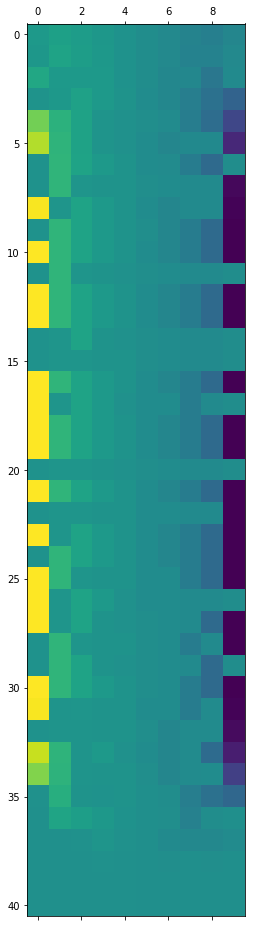

In [33]:
Gkomegaplas = zeros((nk,N),dtype=complex)#eigenvalue of G(k,iw)
Akomegaplus = zeros((nk,N),dtype=complex)#spectral function
eigvector = zeros((nk,N, 2, 2), dtype=complex) #N omega
eigvalue = zeros((nk,N, 1, 2), dtype=complex) #N omega 
for i in range(0,nk):
    for j in range(0,N):
        eigvalue[i,j], eigvector[i,j] = linalg.eig(Gkomega_new[i,j])
        Gkomegaplas[i,j] = eigvalue[i,j,0,0]# uper bond
            
Akomegaplus = -Gkomegaplas / pi
print (eigvalue)
print ('=============')
print (Akomegaplus.imag)

f = open("log.txt","w")   #create add file in write mode
f.write(str(Akomegaplus.imag))  #writes o/p to add.txt file
     
f.close()	
		#closing file object
plt.matshow(Akomegaplus.imag)
plt.show()